# Exploratory Data Analysis

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to check assumption with the help of of statistical summary and graphical representations.

#### 3 Parts of EDA
- Cleansing,
Checking for problems with the collected data, such as missing data or measurement error, data types of columns, etc
- Defining Questions,
Identifying the relationship between the variables that are particularly interesting or unexpected
- Visualization,
Using effective visualizations to communicate the result

In [315]:
# import libraries
from numpy import nan as NA
from datetime import date
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [316]:
#load data
source_dir = os.chdir('C:\\Users\SYAMIL\\Documents\\Data Fellowship\\dataset')
df = pd.read_csv('Ritz_Jager_Data.csv')
df_dict = pd.read_excel('data_dictionary_Ritz_Jager.xlsx')

### Lets do some check for dataframe

In [317]:
#checking basic info from data
print('jumlah baris : {}, jumlah kolom : {}'.format(df.shape[0],df.shape[1]))
df.head()

jumlah baris : 119390, jumlah kolom : 32


,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [318]:
#checking for duplicates
df.duplicated().sum()

31994

In [319]:
#drop duplicate
df = df.drop_duplicates()

In [320]:
#checking data again
print('jumlah baris : {}, jumlah kolom : {}'.format(df.shape[0],df.shape[1]))
df.head()

jumlah baris : 87396, jumlah kolom : 32


,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [321]:
#change columns name
df = df.rename(columns={'arrival_date_year':'year'})
df = df.rename(columns={'arrival_date_month':'month'})
df = df.rename(columns={'arrival_date_day_of_month':'day'})

In [322]:
#checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
hotel_type                        87396 non-null object
is_canceled                       87396 non-null int64
lead_time                         87396 non-null int64
year                              87396 non-null int64
month                             87396 non-null object
arrival_date_week_number          87396 non-null int64
day                               87396 non-null int64
stays_in_weekend_nights           87396 non-null int64
stays_in_week_nights              87396 non-null int64
adults                            87396 non-null int64
children                          87392 non-null float64
babies                            87396 non-null int64
meal_type                         87396 non-null object
country_origin                    86944 non-null object
market_segment                    87396 non-null object
distribution_channel              87396 non-null object
is

In [323]:
#checking for missing values
df.isnull().sum()

hotel_type                            0
is_canceled                           0
lead_time                             0
year                                  0
month                                 0
arrival_date_week_number              0
day                                   0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal_type                             0
country_origin                      452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [324]:
#checking presentage of data from null values
columns = ['children', 'country_origin','agent','company' ]

for i in columns:
    a = df[i].isnull().sum()
    b = a/87396*100
    print ('precentage of missing value form {} is {}%'.format(i,b))

precentage of missing value form children is 0.004576868506567806%
precentage of missing value form country_origin is 0.5171861412421621%
precentage of missing value form agent is 13.951439425145315%
precentage of missing value form company is 93.98256213098998%


### Data Cleansing
Handling with missing values, and data type

In [325]:
# we drop 'company' becuase that columns has 94% missing values 
df = df.drop(['company'],axis=1)

In [326]:
#checking children, country_origin and agent
df[['children','country_origin','agent']]

,children,country_origin,agent
0,0.0,PRT,NaN
1,0.0,PRT,NaN
2,0.0,GBR,NaN
3,0.0,GBR,304.0
4,0.0,GBR,240.0
...,...,...,...
119385,0.0,BEL,394.0
119386,0.0,FRA,9.0
119387,0.0,DEU,9.0
119388,0.0,GBR,89.0


Text(0.5, 1.0, 'distribution from children')

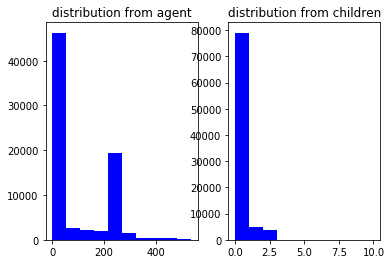

In [327]:
#make chart from agent and children
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.hist(df['agent'], bins=10, color='blue')
ax1.set_title('distribution from agent')
ax2.hist(df['children'], bins=10, color='blue')
ax2.set_title('distribution from children')

In [328]:
#because distribution from agent and children are skew so we fill missing values with median
df['agent'] = df['agent'].fillna(df['agent'].median())
df['children'] = df['children'].fillna(df['children'].median())

In [329]:
#searching for mode from country_origin
df['country_origin'].value_counts()

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
LCA        1
BWA        1
SDN        1
FJI        1
NIC        1
Name: country_origin, Length: 177, dtype: int64

In [330]:
#replace missing value in country origin with mode
df['country_origin'] = df['country_origin'].replace(NA, value='PRT')

In [331]:
#checking for missing value again
df.isnull().sum()

hotel_type                        0
is_canceled                       0
lead_time                         0
year                              0
month                             0
arrival_date_week_number          0
day                               0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal_type                         0
country_origin                    0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

### Questions

1. Where do the guests come from?
2. How Much do guests pay for a room per night?
3. How does the price per night vary over the year?
4. Which are the busiest months?
5. How long do people stay at the hotels?
6. Bookings by market segment
7. How many bookings were cancelled?
8. Which month has the highest number of cancellations?

#### 1. Where do the guests come from?

In [332]:
# to answer question number 1, we need to get dict about country code
df_country = pd.read_csv('wikipedia-iso-country-codes.csv')
df_country.head()

,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX
2,Albania,AL,ALB,8,ISO 3166-2:AL
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ
4,American Samoa,AS,ASM,16,ISO 3166-2:AS


In [333]:
df_country = df_country.rename(columns={'Alpha-3 code':'country_origin'})
df_country = df_country.rename(columns={'English short name lower case':'name'})
df_country.head()

,name,Alpha-2 code,country_origin,Numeric code,ISO 3166-2
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX
2,Albania,AL,ALB,8,ISO 3166-2:AL
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ
4,American Samoa,AS,ASM,16,ISO 3166-2:AS


In [334]:
df_join = pd.merge(df, df_country, on='country_origin', how='left')
df_join.head()

,hotel_type,is_canceled,lead_time,year,month,arrival_date_week_number,day,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,Alpha-2 code,Numeric code,ISO 3166-2
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,1/7/2015,Portugal,PT,620.0,ISO 3166-2:PT
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,1/7/2015,Portugal,PT,620.0,ISO 3166-2:PT
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2/7/2015,United Kingdom,GB,826.0,ISO 3166-2:GB
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2/7/2015,United Kingdom,GB,826.0,ISO 3166-2:GB
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,3/7/2015,United Kingdom,GB,826.0,ISO 3166-2:GB


In [335]:
df_join['name'].value_counts()

Portugal                                27905
United Kingdom                          10433
France                                   8837
Spain                                    7252
Germany                                  5387
                                        ...  
Madagascar                                  1
Mali                                        1
United States Minor Outlying Islands        1
American Samoa                              1
Kiribati                                    1
Name: name, Length: 175, dtype: int64

Text(0.5, 1.0, 'Top 5 home countries')

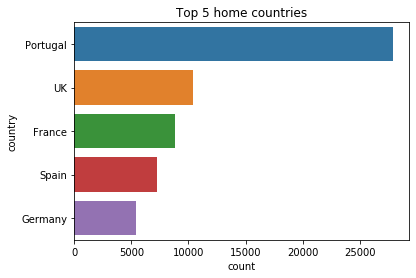

In [336]:
df_top5 = pd.DataFrame({'country':['Portugal','UK','France','Spain','Germany'], 'count':[27905,10433,8837,7252,5387]})
sns.barplot(x='count',y='country',data=df_top5,orient='h').set_title('Top 5 home countries')

#### 2. How Much do guests pay for a room per night?

the distribution has skew value : 10.921446729791073


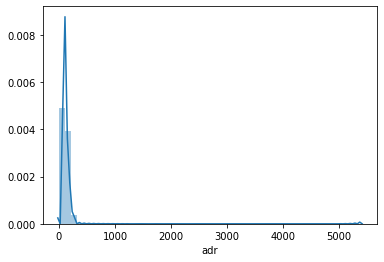

In [337]:
#question number 2
sns.distplot(df['adr'])
skew = df['adr'].skew()
print('the distribution has skew value : {}'.format(skew))

In [338]:
#because the adr distribution has positif skew so, we can choose median to get the conclusion from the data
pay = df['adr'].median()
print('the price paid by the guest is equal to {}'.format(pay))

the price paid by the guest is equal to 98.1


#### 3. How does the price per night vary over the year?

In [339]:
month_dict = {'month':['January', 'February', 'March', 'April','May','June','July','August','September','October','November','December'],
             'month_num':[1,2,3,4,5,6,7,8,9,10,11,12]}
df_month_dict = pd.DataFrame(month_dict)

df_join_month = pd.merge(df,df_month_dict, on='month',how='inner')

DATE = []
for y,m,d in zip(df_join_month['year'],df_join_month['month_num'],df_join_month['day']):
    DATE.append(date(y,m,d))

In [340]:
df['Date'] = DATE
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [341]:
df_15 = df[df['year']==2015]
df_16 = df[df['year']==2016]
df_17 = df[df['year']==2017]

Text(0.5, 1.0, 'Price per Night during 2017')

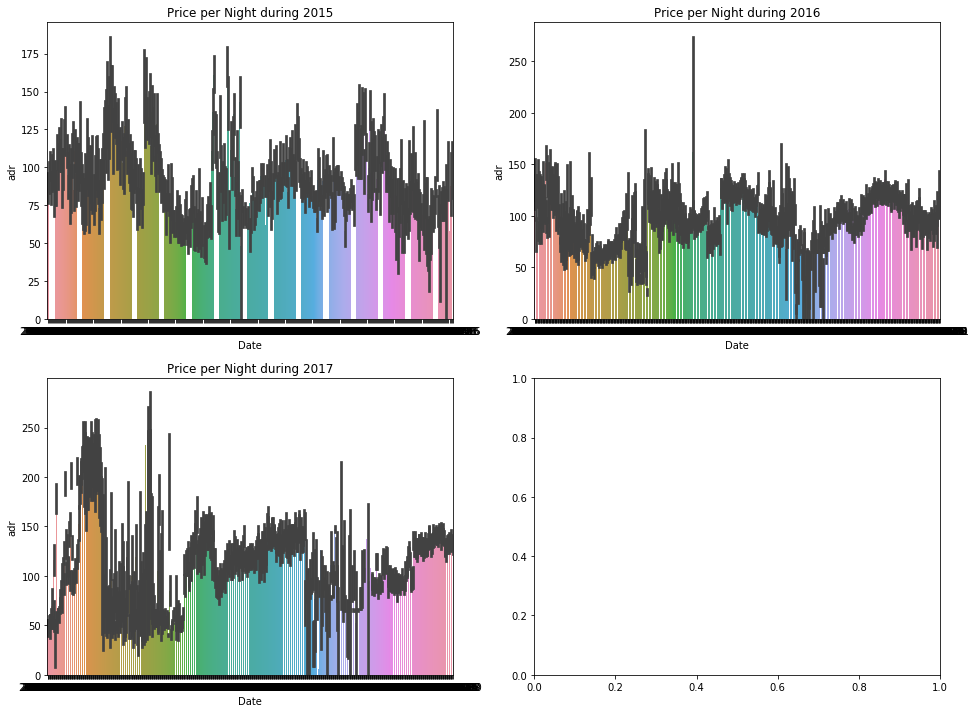

In [342]:
fig,axs = plt.subplots(2, 2, figsize=(16,12))

sns.barplot(x='Date', y='adr',data=df_15, ax=axs[0,0]).set_title('Price per Night during 2015')
sns.barplot(x='Date', y='adr',data=df_16, ax=axs[0,1]).set_title('Price per Night during 2016')
sns.barplot(x='Date', y='adr',data=df_17, ax=axs[1,0]).set_title('Price per Night during 2017')

In [343]:
print('prices per night in 2015 range from {}'.format(df_15['adr'].median()))
print('prices per night in 2016 range from {}'.format(df_16['adr'].median()))
print('prices per night in 2017 range from {}'.format(df_17['adr'].median()))

prices per night in 2015 range from 85.5
prices per night in 2016 range from 94.5
prices per night in 2017 range from 110.0


room rental prices per night from year to year has increased

#### 4. Which are the busiest months?

In [344]:
#make dataframe when there is no canceled
df_month = df[df['is_canceled']==0]

In [345]:
df_month['month'].value_counts()

August       7634
July         6859
May          5913
March        5683
April        5499
June         5411
October      5292
September    5048
February     4683
November     3941
December     3753
January      3655
Name: month, dtype: int64

Text(0.5, 1.0, '5 busiest months')

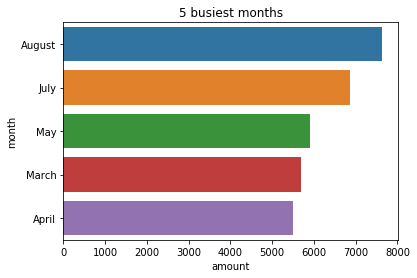

In [346]:
busy = {'month':['August','July','May','March','April'], 'amount':[7634,6859,5913,5683,5499]}
df_busy = pd.DataFrame(busy)
sns.barplot(x='amount', y='month', data=df_busy, orient='h').set_title('5 busiest months')

##### so the busiest months are August, July, May, March, April

#### 5. How long do people stay at the hotels?

In [347]:
#Checking columns
df[['stays_in_weekend_nights','stays_in_week_nights']]

,stays_in_weekend_nights,stays_in_week_nights
0,0,0
1,0,0
2,0,1
3,0,1
4,0,2
...,...,...
119385,2,5
119386,2,5
119387,2,5
119388,2,5


In [348]:
df['days'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df[['stays_in_weekend_nights','stays_in_week_nights','days']]

,stays_in_weekend_nights,stays_in_week_nights,days
0,0,0,0
1,0,0,0
2,0,1,1
3,0,1,1
4,0,2,2
...,...,...,...
119385,2,5,7
119386,2,5,7
119387,2,5,7
119388,2,5,7


the distribution has skew value : 3.073161590617402


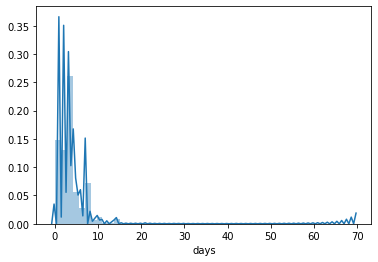

In [349]:
sns.distplot(df['days'])
skew_days = df['days'].skew()
print('the distribution has skew value : {}'.format(skew_days))

In [350]:
print('people stay at the hotels for {} days (median)'.format(df['days'].median()))
print('people stay at the hotels for {} days (mean)'.format(df['days'].mean()))

people stay at the hotels for 3.0 days (median)
people stay at the hotels for 3.6306581536912446 days (mean)


conclusion : people stay at the hotel for approximately 3 to 4 days

#### 6. Bookings by market segment

In [351]:
df['market_segment'].value_counts()

Online TA        51618
Offline TA/TO    13889
Direct           11804
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Undefined            2
Name: market_segment, dtype: int64

Text(0.5, 1.0, 'Bookings by Market Segment')

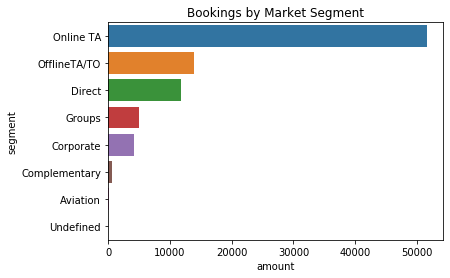

In [352]:
segment = {'segment':['Online TA', 'OfflineTA/TO', 'Direct', 'Groups', 'Corporate','Complementary','Aviation','Undefined'],
           'amount':[51618,13889,11804,4942,4212,702,227,2]}
df_seg = pd.DataFrame(segment)
sns.barplot(x='amount',y='segment', data=df_seg, orient='h').set_title('Bookings by Market Segment')

#### 7. How many bookings were cancelled?

In [353]:
df['is_canceled'].value_counts()

0    63371
1    24025
Name: is_canceled, dtype: int64

Text(0.5, 1.0, 'Number of reservation canceled and not canceled')

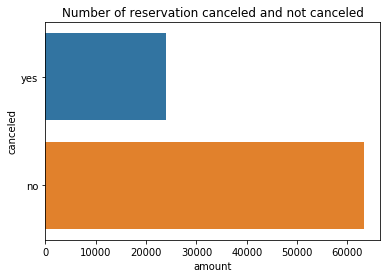

In [354]:
cancel = {'canceled':['yes','no'],'amount':[24025,63371]}
df_can = pd.DataFrame(cancel)
sns.barplot(x='amount', y='canceled',data=df_can,orient='h').set_title('Number of reservation canceled and not canceled')

the number which canceled : 24025

#### 8. Which month has the highest number of cancellations?

In [355]:
df_canceled = df[df['is_canceled']==1]
df_canceled['month'].value_counts()

August       3623
July         3198
May          2442
April        2409
June         2354
March        1830
September    1642
October      1642
February     1415
December     1378
November     1054
January      1038
Name: month, dtype: int64

Text(0.5, 1.0, '5 months with the most cancellations')

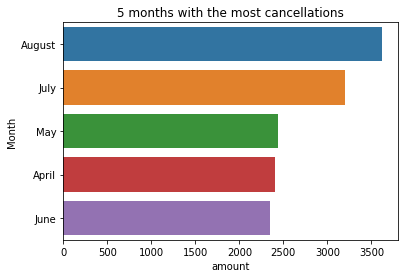

In [356]:
month_canceled = {'Month':['August','July','May','April','June'],'amount':[3623,3198,2442,2409,2354]}

df_month_can = pd.DataFrame(month_canceled)
sns.barplot(x='amount',y='Month', data=df_month_can,orient='h').set_title('5 months with the most cancellations')

##### 5 months with the most cancellations are August, July, May, April, June